In [2]:
import logging
import sys
from pathlib import Path


logging.basicConfig(
    level=logging.INFO,
    format="%(levelname)s: %(message)s",
    force=True,
)

logger = logging.getLogger(__name__)

# Add the src directory to the Python path
sys.path.append(str(Path.cwd().parent.parent))

In [3]:
from src.models.mlp import MLPParams, MLPEvaluator
from src.models.quant.enums import ActivationModule, QMode

from src.datasets.vertebral_dataset import VertebralDataset
from src.datasets.cardio_dataset import CardioDataset
from src.datasets.breast_cancer_dataset import BreastCancerDataset

INFO: Loading cached vertebral from /home/nur/Projects/vut-ip1-nn-quantization/datasets_cache/vertebral_cache.pkl
INFO: Loading cached cardio from /home/nur/Projects/vut-ip1-nn-quantization/datasets_cache/cardio_cache.pkl
INFO: Loading cached breast_cancer from /home/nur/Projects/vut-ip1-nn-quantization/datasets_cache/breast_cancer_cache.pkl


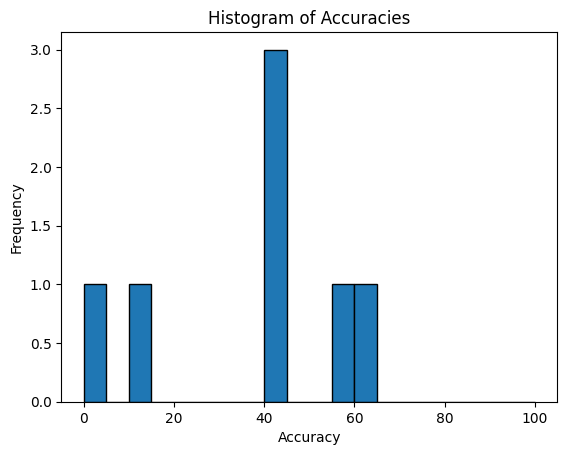

In [4]:
from matplotlib import pyplot as plt


def hist_accuracies(accuracies: list[float]) -> plt.Figure:
    fig, ax = plt.subplots()
    ax.hist(accuracies, bins=20, range=(0, 100), edgecolor="black")
    ax.set_title("Histogram of Accuracies")
    ax.set_xlabel("Accuracy")
    ax.set_ylabel("Frequency")
    return fig


fig = hist_accuracies([1, 14, 43, 63, 44, 44, 56])

In [6]:
train_loader, test_loader = CardioDataset.get_dataloaders(batch_size=64)

p = MLPParams(
    in_height=CardioDataset.input_size,
    in_bitwidth=16,
    out_height=CardioDataset.output_size,
    hidden_layers=2,
    hidden_layers_heights=[32, 16],
    hidden_layers_bitwidths=[16, 8],
    learning_rate=0.01,
    activation=ActivationModule.RELU,
    epochs=30,
    dropout_rate=0.2,
    quantization_mode=QMode.DET,
)

evaluator = MLPEvaluator(train_loader, test_loader)

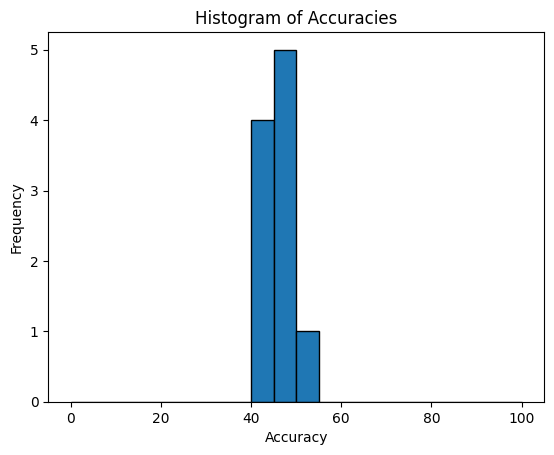

In [9]:
accuracies = []
for _ in range(10):
    best_acc = evaluator.train_model(p)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)

[43.42723004694836,
 49.76525821596244,
 44.36619718309859,
 42.25352112676056,
 41.78403755868545,
 43.42723004694836,
 45.305164319248824,
 43.89671361502347,
 41.54929577464789,
 45.305164319248824]

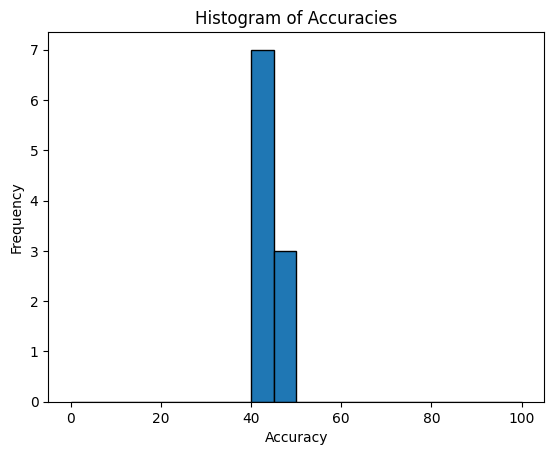

In [ ]:
from dataclasses import replace

reste_params = replace(p)
reste_params.activation = ActivationModule.BINARIZE

accuracies = []
for _ in range(10):
    best_acc = evaluator.train_model(reste_params)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)
accuracies

[44.36619718309859,
 46.009389671361504,
 38.028169014084504,
 46.244131455399064,
 48.12206572769953,
 42.95774647887324,
 43.42723004694836,
 41.07981220657277,
 39.201877934272304,
 43.42723004694836]

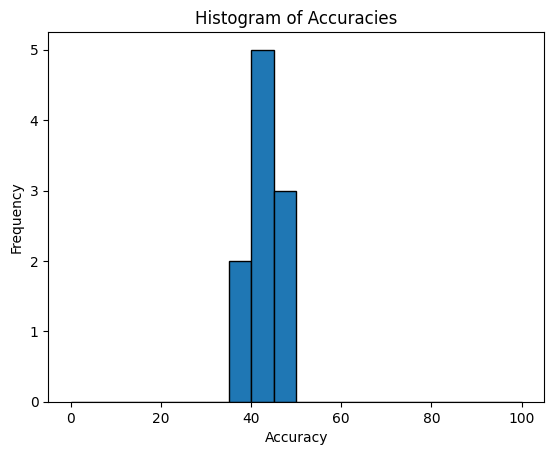

In [10]:
from dataclasses import replace

reste_params = replace(p)
reste_params.activation = ActivationModule.BINARIZE_RESTE

accuracies = []
for _ in range(10):
    best_acc = evaluator.train_model(reste_params)
    accuracies.append(best_acc)

fig = hist_accuracies(accuracies)
accuracies

# Quantization techniques

- Bitwidth quantization
- BNN: Activation func (Using STE for gradients)
- BNN_ReSTE: Activation func (Changing gradients: ReSTE)
- TNN: Activation func (Differentiable?)
- ... Find more?

## How to integrate them

Bitwidth quantization needs:
- Quantization mode (Deterministic, Stochastic)
- Input: Quantize to bits
- Hidden layers: Quantize to bits
- Advanced: Per input quantization
- Advanced: Per layer quantization

BNN needs:
- Quantization mode
- ...

BNN_ReSTE:
- o
- t
- ...


